In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv("/Users/adriancavallaris/Documents/NCAAB_2018_19_data.csv")

In [3]:
X.head()

,School,G,W,SRS,SOS,Tm.,Opp.,MP,FG,FGA,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,Abilene Christian NCAA,34,27,-1.91,-7.34,2502,2161,1370,897,1911,...,457,642,0.712,325,1110,525,297,93,407,635
1,Air Force,32,14,-4.28,0.24,2179,2294,1300,802,1776,...,341,503,0.678,253,1077,434,154,57,423,543
2,Akron,33,17,4.86,1.09,2271,2107,1325,797,1948,...,380,539,0.705,312,1204,399,185,106,388,569
3,Alabama A&M,32,5,-19.23,-8.38,1938,2285,1295,736,1809,...,284,453,0.627,314,1032,385,234,50,487,587
4,Alabama-Birmingham,35,20,0.36,-1.52,2470,2370,1410,906,2003,...,424,630,0.673,367,1279,401,218,82,399,578


In [4]:
X.describe()

,G,W,SRS,SOS,Tm.,Opp.,MP,FG,FGA,FG%,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,33.008499,17.118980,-0.591501,-0.267507,2400.121813,2356.668555,1331.798867,848.872521,1914.107649,0.442997,...,446.410765,632.008499,0.706269,329.402266,1169.535411,443.090652,208.937677,110.410765,426.515581,586.087819
std,1.993580,6.364631,10.320548,5.761562,260.169578,167.525950,80.789477,93.759625,158.127411,0.024408,...,76.118654,103.658105,0.036296,61.538303,121.884607,70.400056,42.418124,33.619167,48.874671,60.263255
min,28.000000,3.000000,-26.820000,-11.240000,1742.000000,1951.000000,1135.000000,598.000000,1442.000000,0.354000,...,235.000000,377.000000,0.584000,167.000000,845.000000,288.000000,116.000000,46.000000,304.000000,455.000000
25%,32.000000,12.000000,-8.100000,-4.690000,2216.000000,2243.000000,1280.000000,787.000000,1803.000000,0.428000,...,395.000000,564.000000,0.682000,285.000000,1085.000000,394.000000,180.000000,85.000000,394.000000,544.000000
50%,33.000000,17.000000,-2.040000,-1.240000,2385.000000,2354.000000,1325.000000,845.000000,1906.000000,0.443000,...,446.000000,628.000000,0.705000,324.000000,1163.000000,440.000000,207.000000,107.000000,423.000000,581.000000
75%,34.000000,21.000000,6.800000,3.310000,2562.000000,2460.000000,1375.000000,901.000000,2006.000000,0.457000,...,491.000000,695.000000,0.732000,370.000000,1238.000000,484.000000,229.000000,134.000000,456.000000,625.000000
max,40.000000,35.000000,27.790000,12.790000,3243.000000,3036.000000,1615.000000,1177.000000,2439.000000,0.526000,...,660.000000,1018.000000,0.810000,519.000000,1589.000000,715.000000,369.000000,257.000000,604.000000,790.000000


In [5]:
X.drop(["School"], axis=1, inplace=True)
y = X.pop("W")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [9]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test)) 

R^2: 0.7951955553833436


In [10]:
%%timeit
model = RandomForestRegressor(500, n_jobs = 1)
model.fit(X_train, y_train)

1.31 s ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
model = RandomForestRegressor(500, n_jobs = -1)
model.fit(X_train, y_train)

947 ms ± 44.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


25 trees
R^2: 0.8026801570572433

50 trees
R^2: 0.7966797106840257

100 trees
R^2: 0.8019456907418888

200 trees
R^2: 0.7962809409227113

500 trees
R^2: 0.8025531420334779

750 trees
R^2: 0.8023996732290877

1000 trees
R^2: 0.8027497906850589



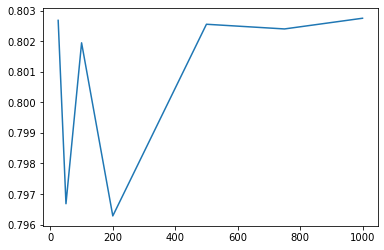

In [12]:
results = []
n_estimator_options = [25, 50, 100, 200, 500, 750, 1000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, n_jobs = -1)
    model.fit(X_train, y_train)
    print (trees, "trees")
    r2 = model.score(X_test, y_test)
    print ("R^2:", r2)
    results.append(r2)
    print ("")
pd.Series(results, n_estimator_options).plot();

auto option
R^2: 0.8023304640834883

None option
R^2: 0.805228262543914

sqrt option
R^2: 0.7563745953089482

log2 option
R^2: 0.7612252726854721

0.5 option
R^2: 0.7913164185162224

0.6 option
R^2: 0.7983161055228353

0.7 option
R^2: 0.798844815628229

0.8 option
R^2: 0.7985894914703451

0.9 option
R^2: 0.7982661986412481

2 option
R^2: 0.7443805028776607



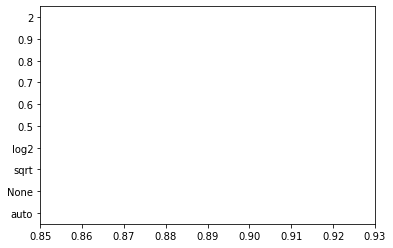

In [13]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.5, 0.6, 0.7, 0.8, .9, 2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_features = max_features)
    model.fit(X_train, y_train)
    print (max_features, "option")
    r2 = model.score(X_test, y_test)
    print ("R^2:", r2)
    results.append(r2)
    print ("")
pd.Series(results, max_features_options).plot(kind = "barh", xlim = (.85,.93));

1 min samples
R^2: 0.8052005327082041

2 min samples
R^2: 0.7993650541278765

3 min samples
R^2: 0.8004003439670475

4 min samples
R^2: 0.7929188468435483

5 min samples
R^2: 0.7892990411241233

6 min samples
R^2: 0.7816544177198315

7 min samples
R^2: 0.7774555697848251

8 min samples
R^2: 0.768000519879602

9 min samples
R^2: 0.7602649169840285

10 min samples
R^2: 0.754932068919323



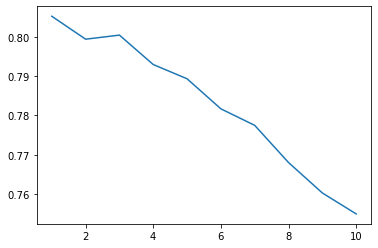

In [14]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_features = None, 
                                  min_samples_leaf = min_samples)
    model.fit(X_train, y_train)
    print (min_samples, "min samples")
    r2 = model.score(X_test, y_test)
    print ("R^2:", r2)
    results.append(r2)
    print ("")
pd.Series(results, min_samples_leaf_options).plot();

In [18]:
model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_features = None, 
                                  min_samples_leaf = 1)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv = 10)

In [19]:
scores

array([0.76543812, 0.78102566, 0.89245386, 0.82625826, 0.89871194,
       0.86492941, 0.75878876, 0.81807902, 0.88023422, 0.79328966])

In [20]:
mean = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
confInterval =  2.262 * std_error
lowerBound = mean - confInterval
upperBound = mean + confInterval

print ("Score is %f +/-  %f" % (mean, confInterval))
print ('Thus, there is a 95 percent probability that if this experiment were repeated, the average score would be between %f and %f' % (lowerBound, upperBound))

Score is 0.827921 +/-  0.036095
Thus, there is a 95 percent probability that if this experiment were repeated, the average score would be between 0.791825 and 0.864016


In [21]:
model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_features = None, 
                                  min_samples_leaf = 1)
model.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=1000, n_jobs=-1)

In [22]:
predicted_probs = model.predict(X)

In [23]:
numpy.savetxt("results.csv", predicted_probs, fmt='%.2f', delimiter = ",")